# Import

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crime Data

In [2]:
df_crime = pickle.load(open("Crime_Rate","rb"))
crime_rate_year_avg = []
year_list = [a for a in range(2007,2014)]

In [3]:
for year in year_list:
    crime_rates = [a for a in df_crime.xs(year,axis=1).tolist()]
    crime_rate_year_avg.append(sum(crime_rates)/len(crime_rates))

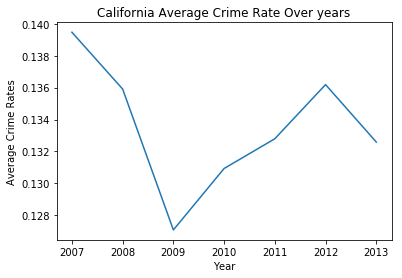

In [4]:
plt.figure()
plt.title("California Average Crime Rate Over years")
plt.ylabel("Average Crime Rates")
plt.xlabel("Year")
plt.plot(year_list,crime_rate_year_avg)
plt.savefig("crime_rate_year_avg.png")
plt.show()

# Unemployment Rate

In [5]:
df_unemployment = pickle.load(open("unemploymentDataFile","rb"))
unemployment_rate_year_avg = []
year_list = [a for a in range(2007,2014)]

In [6]:
for year in year_list:
    unemployment_rates = [a for a in df_unemployment.xs(str(year),axis=1).tolist()]
    unemployment_rate_year_avg.append(sum(unemployment_rates)/len(unemployment_rates))

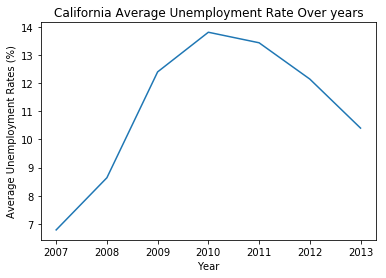

In [7]:
plt.figure()
plt.title("California Average Unemployment Rate Over years")
plt.ylabel("Average Unemployment Rates (%)")
plt.xlabel("Year")
plt.plot(year_list,unemployment_rate_year_avg)
plt.savefig("unemployment_rate_year_avg.png")
plt.show()

# Physical Scores

In [8]:
df_phyisical = pickle.load(open("physical_fitness_data.pkl","rb")).transpose()
physical_scores_year_avg = []
year_list = [a for a in range(2007,2014)]

In [9]:
for year in year_list:
    physical_scores = [a for a in df_phyisical.xs(str(year),axis=1).tolist()]
    physical_scores_year_avg.append(sum(physical_scores)/len(physical_scores))

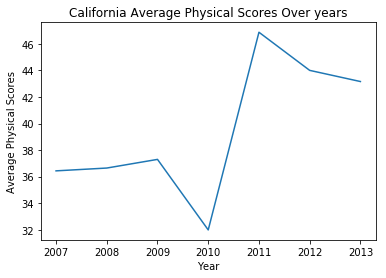

In [10]:
plt.figure()
plt.title("California Average Physical Scores Over years")
plt.ylabel("Average Physical Scores")
plt.xlabel("Year")
plt.plot(year_list,physical_scores_year_avg)
plt.savefig("physical_scores_year_avg.png")
plt.show()

# SAT Scores

In [11]:
df_sat = pickle.load(open("sat_data.pkl","rb"))
sat_scores_year_avg = []
year_list = [a for a in range(2007,2014)]

In [12]:
for i in range(7,len(df_sat)):
    sat_verbal = df_sat[i].xs(df_sat[i].columns[1],axis=1).tolist()
    sat_math = df_sat[i].xs(df_sat[i].columns[2],axis=1).tolist()
    total = [a+b for a,b in zip(sat_verbal,sat_math)]
    default_none = sum(total)/len(total)
    total.insert(1,default_none)
    if i == 9: total.insert(45,default_none)
    sat_scores_year_avg.append(sum(total)/len(total))

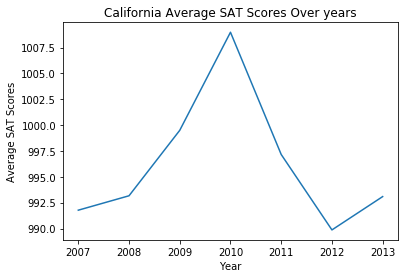

In [13]:
plt.figure()
plt.title("California Average SAT Scores Over years")
plt.ylabel("Average SAT Scores")
plt.xlabel("Year")
plt.plot(year_list,sat_scores_year_avg)
plt.savefig("sat_scores_year_avg.png")
plt.show()

Show All SAT Trending for All Counties

In [14]:
sat_np = np.zeros((7,58))
for i in range(7,len(df_sat)):
    sat_verbal = df_sat[i].xs(df_sat[i].columns[1],axis=1).tolist()
    sat_math = df_sat[i].xs(df_sat[i].columns[2],axis=1).tolist()
    total = [a+b for a,b in zip(sat_verbal,sat_math)]
    default_none = sum(total)/len(total)
    total.insert(1,default_none)
    if i == 9: total.insert(45,default_none)
    sat_np[i-7] += np.array(total)
sat_np = sat_np.transpose()

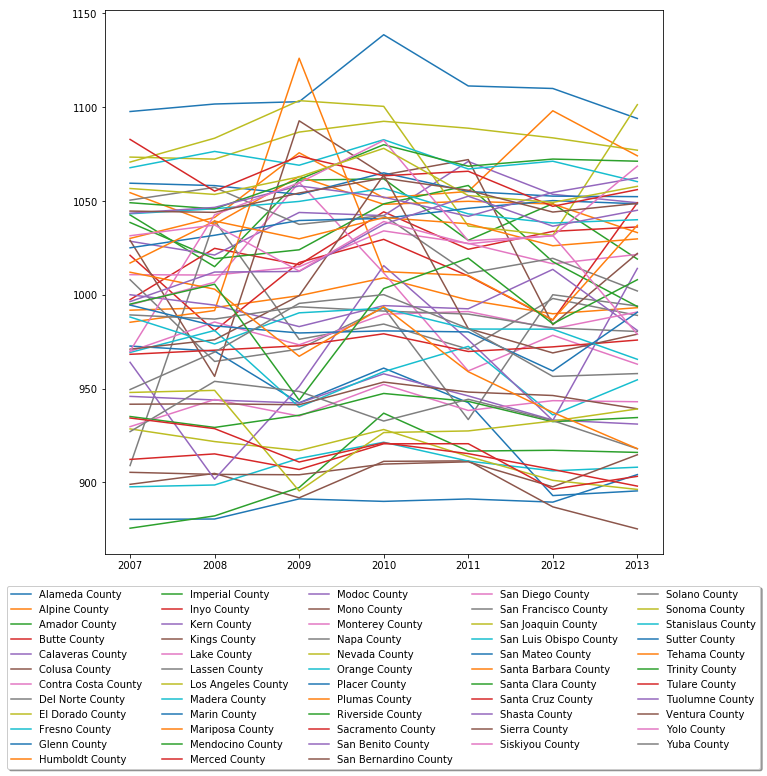

In [15]:
plt.figure(figsize=(10,10))
for i in range(len(sat_np)):
    plt.plot(year_list,sat_np[i])
plt.legend(df_crime.index.tolist(), loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

# Pair Analysis

### Crime and Unemployment for SAT Scores

In [16]:
crime_sat_pair = []
unemployment_sat_pair = []
for year in year_list:
    crime_rates = [a for a in df_crime.xs(year,axis=1).tolist()]
    unemployment_rates = [a for a in df_unemployment.xs(str(year),axis=1).tolist()]
    
    sat_verbal = df_sat[year-2007+7].xs(df_sat[year-2007+7].columns[1],axis=1).tolist()
    sat_math = df_sat[year-2007+7].xs(df_sat[year-2007+7].columns[2],axis=1).tolist()
    total = [a+b for a,b in zip(sat_verbal,sat_math)]
    default_none = sum(total)/len(total)
    total.insert(1,default_none)
    if i == 9: total.insert(45,default_none)    

    crime_sat_pair += [(a,b) for a,b in zip(crime_rates,total)]
    unemployment_sat_pair += [(a,b) for a,b in zip(unemployment_rates,total)]

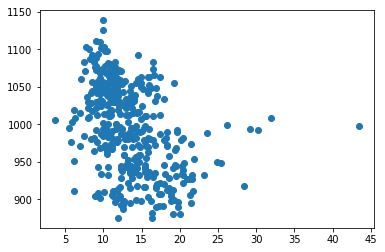

In [17]:
plt.figure()
x_coord = [a[0]*100 for a in crime_sat_pair]
y_coord = [a[1] for a in crime_sat_pair]
plt.scatter(x_coord,y_coord)
plt.show()

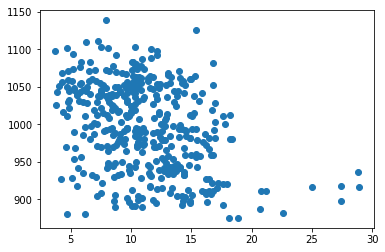

In [18]:
plt.figure()
x_coord = [a[0] for a in unemployment_sat_pair]
y_coord = [a[1] for a in unemployment_sat_pair]
plt.scatter(x_coord,y_coord)
plt.show()

In [19]:
crime_sat_pair_batch_1 = []
crime_sat_pair_batch_2 = []
crime_sat_pair_batch_3 = []
crime_sat_pair_batch_4 = []

for t in crime_sat_pair:
    if t[0]<=0.1:
        crime_sat_pair_batch_1.append(t[1])
    if t[0]>0.1 and t[0]<=0.15:
        crime_sat_pair_batch_2.append(t[1])
    if t[0]>0.15 and t[0]<=0.2:
        crime_sat_pair_batch_3.append(t[1])
    if t[0]>0.2:
        crime_sat_pair_batch_4.append(t[1])
        
crime_sat_pair_batches = [crime_sat_pair_batch_1,
                          crime_sat_pair_batch_2,
                          crime_sat_pair_batch_3,
                          crime_sat_pair_batch_4]

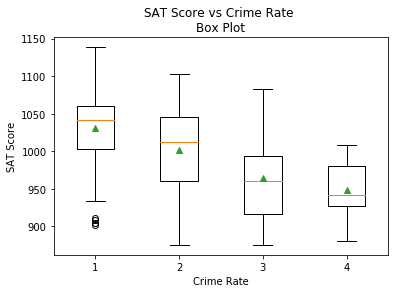

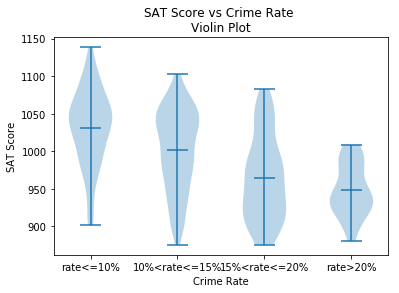

In [20]:
plt.xticks(np.arange(1,5),['rate<=10%', '10%<rate<=15%', '15%<rate<=20%', 'rate>20%'])
plt.ylabel('SAT Score')
plt.xlabel('Crime Rate')
plt.title('SAT Score vs Crime Rate \nBox Plot')
plt.boxplot(crime_sat_pair_batches, vert=True,showmeans=True)
plt.show()

plt.xticks(np.arange(1,5),['rate<=10%', '10%<rate<=15%', '15%<rate<=20%', 'rate>20%'])
plt.ylabel('SAT Score')
plt.xlabel('Crime Rate')
plt.title('SAT Score vs Crime Rate \nViolin Plot')
plt.violinplot(crime_sat_pair_batches, vert=True,showmeans=True)
plt.show()

In [21]:
unemployment_sat_pair_batch_1 = []
unemployment_sat_pair_batch_2 = []
unemployment_sat_pair_batch_3 = []
unemployment_sat_pair_batch_4 = []

for t in unemployment_sat_pair:
    if t[0]<=10:
        unemployment_sat_pair_batch_1.append(t[1])
    if t[0]>10 and t[0]<=15:
        unemployment_sat_pair_batch_2.append(t[1])
    if t[0]>15 and t[0]<=20:
        unemployment_sat_pair_batch_3.append(t[1])
    if t[0]>20:
        unemployment_sat_pair_batch_4.append(t[1])
        
unemployment_sat_pair_batches = [unemployment_sat_pair_batch_1,
                                 unemployment_sat_pair_batch_2,
                                 unemployment_sat_pair_batch_3,
                                 unemployment_sat_pair_batch_4]

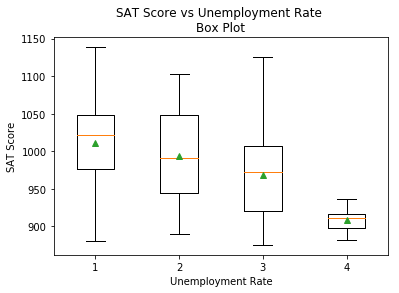

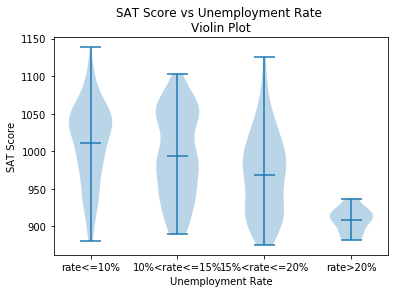

In [22]:
plt.xticks(np.arange(1,5),['rate<=10%', '10%<rate<=15%', '15%<rate<=20%', 'rate>20%'])
plt.ylabel('SAT Score')
plt.xlabel('Unemployment Rate')
plt.title('SAT Score vs Unemployment Rate \nBox Plot')
plt.boxplot(unemployment_sat_pair_batches, vert=True,showmeans=True)
plt.show()

plt.xticks(np.arange(1,5),['rate<=10%', '10%<rate<=15%', '15%<rate<=20%', 'rate>20%'])
plt.ylabel('SAT Score')
plt.xlabel('Unemployment Rate')
plt.title('SAT Score vs Unemployment Rate \nViolin Plot')
plt.violinplot(unemployment_sat_pair_batches, vert=True,showmeans=True)
plt.show()

### Crime and Unemployment for Physical Scores

In [23]:
crime_physical_pair = []
unemployment_physical_pair = []
for year in year_list:
    crime_rates = [a for a in df_crime.xs(year,axis=1).tolist()]
    unemployment_rates = [a for a in df_unemployment.xs(str(year),axis=1).tolist()]
    physical_scores = [a for a in df_phyisical.xs(str(year),axis=1).tolist()]
    crime_physical_pair += [(a,b) for a,b in zip(crime_rates,physical_scores)]
    unemployment_physical_pair += [(a,b) for a,b in zip(unemployment_rates,physical_scores)]

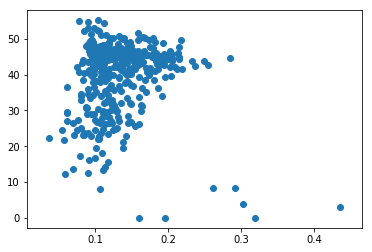

In [24]:
plt.figure()
x_coord = [a[0] for a in crime_physical_pair]
y_coord = [a[1] for a in crime_physical_pair]
plt.scatter(x_coord,y_coord)
plt.show()

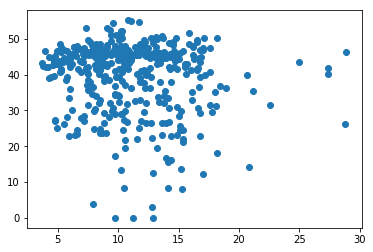

In [25]:
plt.figure()
x_coord = [a[0] for a in unemployment_physical_pair]
y_coord = [a[1] for a in unemployment_physical_pair]
plt.scatter(x_coord,y_coord)
plt.show()

In [26]:
crime_physical_pair_batch_1 = []
crime_physical_pair_batch_2 = []
crime_physical_pair_batch_3 = []

for t in crime_physical_pair:
    if t[0]<=0.1:
        crime_physical_pair_batch_1.append(t[1])
    if t[0]>0.1 and t[0]<=0.2:
        crime_physical_pair_batch_2.append(t[1])
    if t[0]>0.2:
        crime_physical_pair_batch_3.append(t[1])
        
crime_physical_pair_batches = [crime_physical_pair_batch_1,
                               crime_physical_pair_batch_2,
                               crime_physical_pair_batch_3]

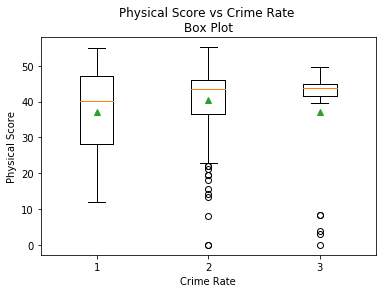

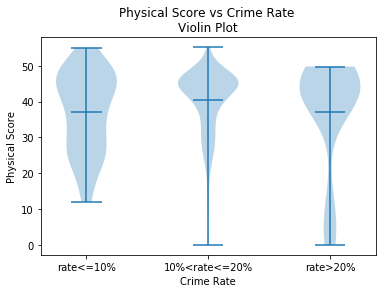

In [28]:
plt.xticks(np.arange(1,4),['rate<=10%', '10%<rate<=20%', 'rate>20%'])
plt.ylabel('Physical Score')
plt.xlabel('Crime Rate')
plt.title('Physical Score vs Crime Rate \nBox Plot')
plt.boxplot(crime_physical_pair_batches, vert=True,showmeans=True)
plt.show()

plt.xticks(np.arange(1,4),['rate<=10%', '10%<rate<=20%', 'rate>20%'])
plt.ylabel('Physical Score')
plt.xlabel('Crime Rate')
plt.title('Physical Score vs Crime Rate \nViolin Plot')
plt.violinplot(crime_physical_pair_batches, vert=True,showmeans=True)
plt.show()

In [29]:
unemployment_physical_pair_batch_1 = []
unemployment_physical_pair_batch_2 = []
unemployment_physical_pair_batch_3 = []
unemployment_physical_pair_batch_4 = []

for t in unemployment_physical_pair:
    if t[0]<=5:
        unemployment_physical_pair_batch_1.append(t[1])
    if t[0]>5 and t[0]<=10:
        unemployment_physical_pair_batch_2.append(t[1])
    if t[0]>10 and t[0]<=15:
        unemployment_physical_pair_batch_3.append(t[1])
    if t[0] > 15:
        unemployment_physical_pair_batch_4.append(t[1])
        
unemployment_physical_pair_batches = [unemployment_physical_pair_batch_1,
                                      unemployment_physical_pair_batch_2,
                                      unemployment_physical_pair_batch_3,
                                      unemployment_physical_pair_batch_4]

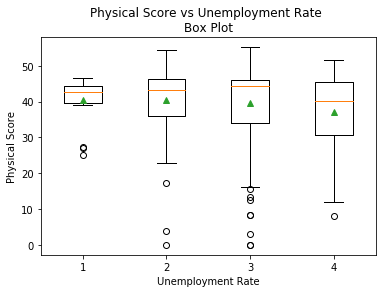

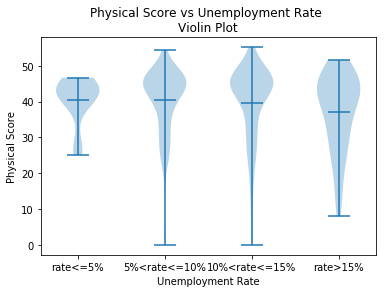

In [30]:
plt.xticks(np.arange(1,5),['rate<=5%', '5%<rate<=10%', '10%<rate<=15%', 'rate>15%'])
plt.ylabel('Physical Score')
plt.xlabel('Unemployment Rate')
plt.title('Physical Score vs Unemployment Rate \nBox Plot')
plt.boxplot(unemployment_physical_pair_batches, vert=True,showmeans=True)
plt.show()

plt.xticks(np.arange(1,5),['rate<=5%', '5%<rate<=10%', '10%<rate<=15%', 'rate>15%'])
plt.ylabel('Physical Score')
plt.xlabel('Unemployment Rate')
plt.title('Physical Score vs Unemployment Rate \nViolin Plot')
plt.violinplot(unemployment_physical_pair_batches, vert=True,showmeans=True)
plt.show()